<a href="https://colab.research.google.com/github/ntlt/Nguyen-Thi-Linh-Trang-191446079/blob/main/ANN_DOF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import math
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten,LeakyReLU
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [2]:
data_robot = []
l1 = 50
l2 = 40
for theta1 in range (-100,100):
    for theta2 in range (-140,140):
        px = l1*np.cos(np.radians(theta1)) + l2*np.cos(np.radians(theta1 + theta2))
        py = l1*np.sin(np.radians(theta1)) + l2*np.sin(np.radians(theta1 + theta2))
        data_robot.append([theta1,theta2,px,py])
data = pd.DataFrame(data_robot,columns=['theta1','theta2','Px','Py'])
data

,theta1,theta2,Px,Py
0,-100,-140,-28.682409,-14.599371
1,-100,-139,-29.283932,-14.953696
2,-100,-138,-29.879179,-15.318464
3,-100,-137,-30.467970,-15.693565
4,-100,-136,-31.050125,-16.078885
...,...,...,...,...
55995,99,135,-31.333133,17.023737
55996,99,136,-30.764781,16.618335
55997,99,137,-30.189439,16.222914
55998,99,138,-29.607285,15.837594


In [3]:
y_df=data.drop(['Px','Py'],axis =1)
x_df=data.drop(['theta1','theta2'],axis =1)
print(x_df.shape,y_df.shape)

(56000, 2) (56000, 2)


In [4]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1048,activation='relu'))
model.add(Dense(1048,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1048)              537624    
                                                                 
 dense_3 (Dense)             (None, 1048)              1099352   
                                                                 
 dropout_1 (Dropout)         (None, 1048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               5

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.25,random_state =7)

In [6]:
model.compile(loss = 'mse', optimizer = RMSprop() , metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=1000,epochs=100,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 


Epoch 1/100
34/34 [==============================] - 7s 29ms/step - loss: 3831.5217 - accuracy: 0.5365 - val_loss: 3019.9629 - val_accuracy: 0.5542
Epoch 2/100
34/34 [==============================] - 0s 14ms/step - loss: 3082.0852 - accuracy: 0.5547 - val_loss: 3005.5442 - val_accuracy: 0.5670
Epoch 3/100
34/34 [==============================] - 0s 12ms/step - loss: 3081.1765 - accuracy: 0.5568 - val_loss: 3199.4790 - val_accuracy: 0.5588
Epoch 4/100
34/34 [==============================] - 0s 13ms/step - loss: 3053.5322 - accuracy: 0.5609 - val_loss: 3416.5542 - val_accuracy: 0.5586
Epoch 5/100
34/34 [==============================] - 0s 12ms/step - loss: 3031.4004 - accuracy: 0.5587 - val_loss: 2995.0105 - val_accuracy: 0.5690
Epoch 6/100
34/34 [==============================] - 0s 14ms/step - loss: 3005.3464 - accuracy: 0.5623 - val_loss: 3012.4434 - val_accuracy: 0.5690
Epoch 7/100
34/34 [==============================] - 1s 17ms/step - loss: 2991.3762 - accuracy: 0.5660 - val_los

In [7]:
model.save('DOF2.h5')

In [8]:
score = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss =', score[0])
print('Test accuracy =', score[1])

438/438 [==============================] - 1s 2ms/step - loss: 2351.5291 - accuracy: 0.7069
Test loss = 2351.529052734375
Test accuracy = 0.706928551197052


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

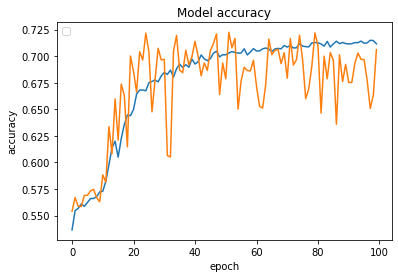

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train', 'validation', loc = 'upper left')
plt.show()

In [10]:
from tensorflow.keras.models import load_model
AMM_DOF2 = load_model('DOF2.h5')

In [11]:
model_test=load_model('DOF2.h5')

In [12]:
A = np.array([[70,85],[5,70]])
y_predict = model_test.predict(A)
print(y_predict)

[[56.89419     0.68712807]
 [49.77011    91.24478   ]]
